In [1]:
import pandas as pd 
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import pickle
import time 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
import os
os.listdir('data_collection/data')

['for_exploration.ipynb',
 'art_topic_distribution.csv',
 'user_tweet_pair.csv',
 '.DS_Store',
 'user_tweet_topic.csv',
 'art_info_w_topic.csv',
 'linksWIP.csv',
 'art_info1.csv',
 'unq_links_2.pkl',
 'unique_user_topic_distribution.csv',
 'unq_links_1.pkl',
 'unq_links_1_2.pkl',
 'unq_links.pkl',
 'cl_pickles',
 'user_tweet.gexf',
 'cluster5.pkl',
 'nytposts_readyforarticle.csv',
 'linksFinal.csv',
 '.ipynb_checkpoints',
 'user_topic.gexf',
 'unq_links_2_2.pkl',
 'links.pkl',
 'unique_users.csv',
 'user_topic100.gexf']

In [2]:
clusters = pd.read_csv('data_collection/data/unique_user_topic_distribution.csv')
clusters.head()


,Unnamed: 0,user_id,screen_name,location,retweet_list,retweet_count,0,1,2,3,4
0,0,55651793,['JSullivanIII'],"['Queens, NYC']","[1097372619848986625, 1096157615225212933, 109...",18,7,5,2,3,1
1,1,191972027,['ojessen'],['Kiel'],"[1097372619848986625, 1096696739128578048, 109...",8,4,2,1,0,1
2,2,22681390,['leehlawrence'],[''],"[1097372619848986625, 1097368941842837506, 109...",4,1,1,1,1,0
3,3,897359310308622336,['enaliyuddin'],"['Yogyakarta, Indonesia']","[1097372619848986625, 1093800374614585344]",2,1,1,0,0,0
4,4,4141824748,['eleftheria20464'],[''],"[1097372619848986625, 1097364848890007552, 109...",72,35,17,9,7,4


In [3]:
clusters.query('retweet_count > 2').shape

(8969, 11)

In [47]:
X = clusters.iloc[:, 6:].values

In [11]:
# kmeans = MiniBatchKMeans(n_clusters=10, random_state=0).fit(X)

In [6]:

n_clusters = [4, 6, 8, 10, 12, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]
scores = pickle.load(open('data_collection/data/cl_pickles/scores.pkl', 'rb'))

for n in n_clusters: 
    if n not in scores: 
        t1 = time.time()

        print(f'Clustering users into {n} groups')
        model = AgglomerativeClustering(n_clusters= n, linkage="average", affinity= 'cosine')
        model.fit(X)
        pickle.dump(model,open(f'data_collection/data/cl_pickles/clusters_{n}.pkl','wb'))

        t2 = time.time()
        print(f'Time to fit: {round((t2-t1)/60)} minutes')

        print('Calculating scores')
        t3 = time.time()

        scores[n] = metrics.silhouette_score(X, model.labels_, metric='euclidean')
        pickle.dump(scores, open('data_collection/data/cl_pickles/scores.pkl', 'wb'))

        t4 = time.time()
        print(f'Time to calculate score: {round((t4-t3)/60)} minutes')

        t5 = time.time()
        print(f'Total time: {round((t5-t1)/60)} minutes')
        print(f'For {n} clusters, score: {scores[n]}')


In [40]:
n_clusters = [4, 6, 8, 10, 12, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]
scores = pickle.load(open('data_collection/data/cl_pickles/scores.pkl', 'rb'))
scores

{4: 0.28538783313103905,
 6: 0.4595198981581722,
 8: 0.4559947922592872,
 10: 0.4695044295685622,
 12: 0.47279411224246504,
 15: 0.5248996889349827,
 20: 0.5332859981372092,
 25: 0.5382707615180421,
 30: 0.7089132328414959,
 40: 0.7110579849260218,
 50: 0.7646412259798688,
 60: 0.7705689610913299,
 70: 0.7731672393142621,
 80: 0.7740693885856925,
 90: 0.7746782931445395,
 100: 0.7809423138935769}

In [41]:
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)




data = [go.Scatter(x = list(scores.keys()),  y = list(scores.values()), 
                   marker=dict(color = 'rgb(0, 128, 128)'), 
                   name = 'Retweets',
                   opacity=0.80)]

layout = go.Layout(
    title='Avg. Silhouette score',
    xaxis=dict(
        title='Number of User Clusters',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Score',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)


py.offline.iplot(go.Figure(data = data, layout = layout), filename='basic-line')

In [37]:
X2 = clusters.query('retweet_count > 2').iloc[:, 6:].values

n_clusters = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000]
# scores_2= {}

for n in n_clusters: 
    if n not in scores_2: 
        t1 = time.time()

        print(f'Clustering users into {n} groups')
        model = AgglomerativeClustering(n_clusters= n, linkage="average", affinity= 'cosine')
        model.fit(X2)
        pickle.dump(model,open(f'data_collection/data/cl_pickles/clusters_2_{n}.pkl','wb'))

        t2 = time.time()
        print(f'Time to fit: {round((t2-t1)/60)} minutes')

        print('Calculating scores')
        t3 = time.time()

        scores_2[n] = metrics.silhouette_score(X2, model.labels_, metric='euclidean')
        pickle.dump(scores, open('data_collection/data/cl_pickles/scores_2.pkl', 'wb'))

        t4 = time.time()
        print(f'Time to calculate score: {round((t4-t3)/60)} minutes')

        t5 = time.time()
        print(f'Total time: {round((t5-t1)/60)} minutes')
        print(f'For {n} clusters, score: {scores_2[n]}')


Clustering users into 900 groups
Time to fit: 0 minutes
Calculating scores
Time to calculate score: 0 minutes
Total time: 0 minutes
For 900 clusters, score: 0.4278718388193804
Clustering users into 1000 groups
Time to fit: 0 minutes
Calculating scores
Time to calculate score: 0 minutes
Total time: 0 minutes
For 1000 clusters, score: 0.46056114851221824


In [39]:
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)




data = [go.Scatter(x = list(scores_2.keys()),  y = list(scores_2.values()), 
                   marker=dict(color = 'rgb(0, 128, 128)'), 
                   name = 'Retweets',
                   opacity=0.80)]

layout = go.Layout(
    title='Avg. Silhouette score',
    xaxis=dict(
        title='Number of User Clusters',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Score',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)


py.offline.iplot(go.Figure(data = data, layout = layout), filename='basic-line')

In [22]:
scores_2

{10: -0.2522258102645895,
 20: -0.22720431066994215,
 30: -0.2135423589796284,
 40: -0.12905001177781486,
 50: -0.13112190310000818,
 60: -0.09067196969756777,
 70: -0.037160487339340534,
 80: -0.018625991340989665,
 90: -0.0042842105990517736,
 100: 0.0016321990741778004,
 120: 0.04113806247797361,
 150: 0.05155845034581579,
 200: 0.13884742326172966,
 250: 0.17554630806079435,
 300: 0.1837862766669317,
 350: 0.235217201904757,
 400: 0.2674943422161469,
 450: 0.2994301816482755,
 500: 0.3248166699323483,
 600: 0.34026878793986726,
 700: 0.3650375188802778,
 800: 0.4072097624752396}

Automatically created module for IPython interactive environment
For n_clusters = 40 The average silhouette_score is : 0.7110579849260218
For n_clusters = 50 The average silhouette_score is : 0.7646412259798688
For n_clusters = 60 The average silhouette_score is : 0.7705689610913299
For n_clusters = 70 The average silhouette_score is : 0.7731672393142621


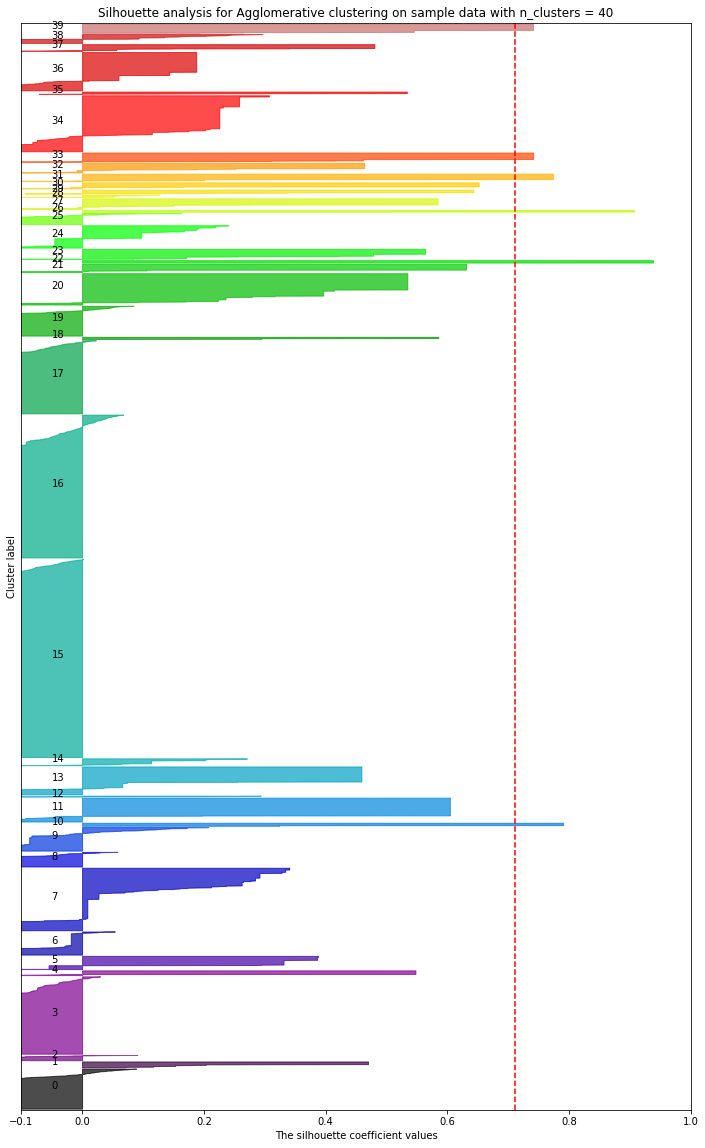

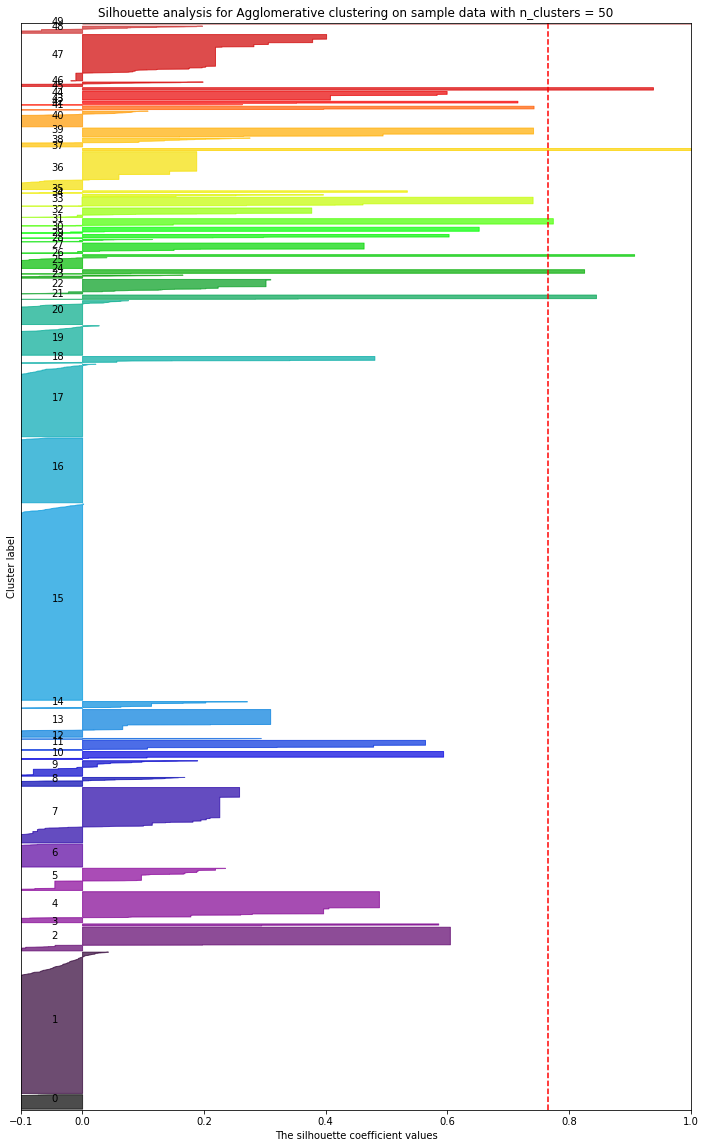

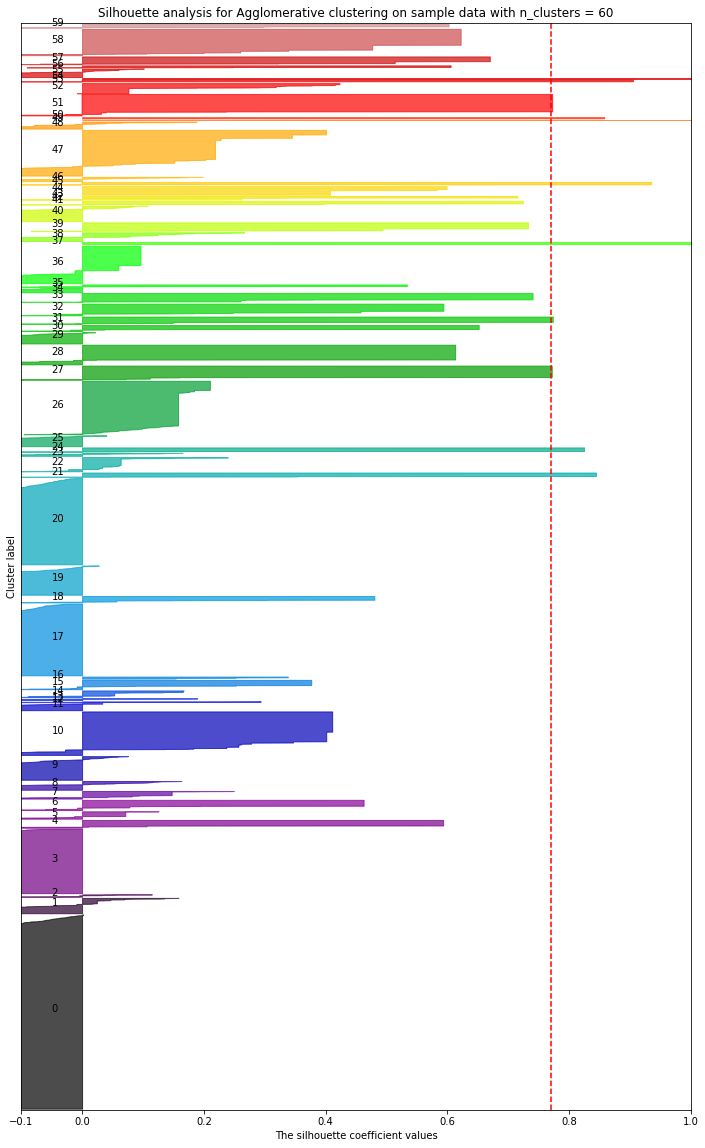

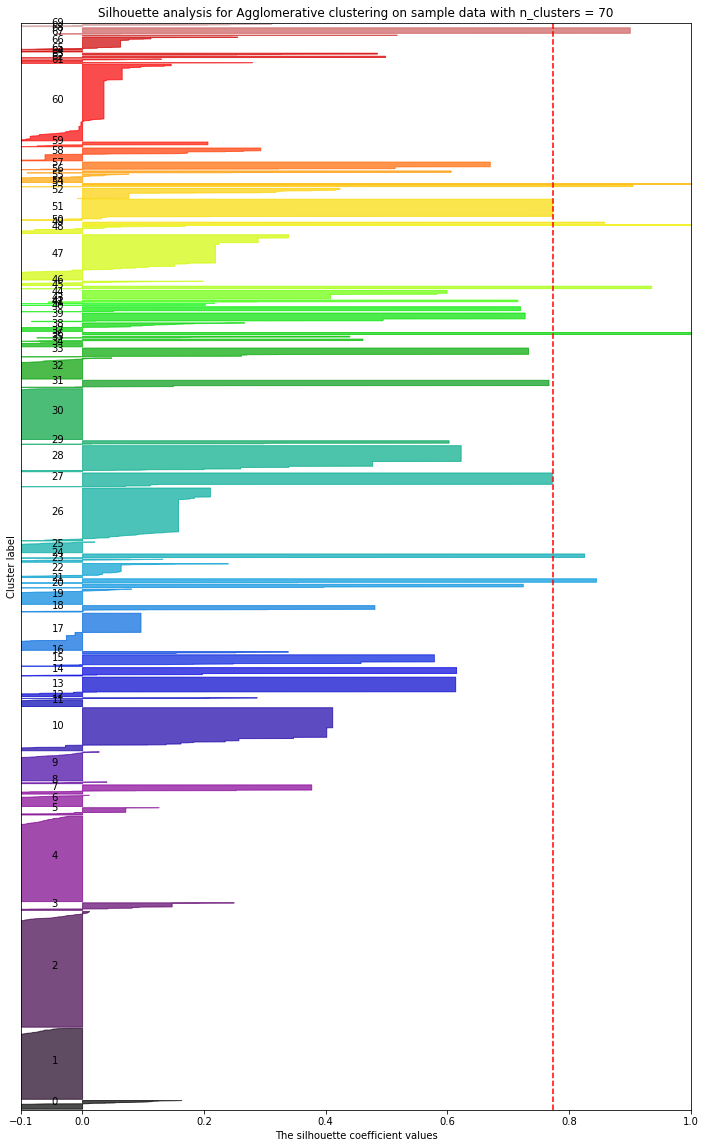

In [44]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [40, 50, 60, 70]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(12, 20)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X2) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = pickle.load(open(f'data_collection/data/cl_pickles/clusters_{n_clusters}.pkl', 'rb'))
    cluster_labels = clusterer.fit_predict(X2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = scores[n_clusters]
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X2, clusterer.labels_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette analysis for Agglomerative clustering on sample data "
                  "with n_clusters = %d" % n_clusters)
    ax1.set_xlabel("Silhouette coefficients")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#     # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(X2[:, 0], X2[:, 1], marker='.', s=30, lw=0, alpha=0.7,
#                 c=colors, edgecolor='k')

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

#     plt.suptitle(("Silhouette analysis for Agglomerative clustering on sample data "
#                   "with n_clusters = %d" % n_clusters),
#                  fontsize=14, fontweight='bold')

plt.show()

In [5]:
scores

{4: 0.28538783313103905}

In [16]:
# AC = AgglomerativeClustering(n_clusters= 5, linkage="average", affinity= 'cosine')
AC2 = AgglomerativeClustering(n_clusters= 8, linkage="average", affinity= 'cosine')

In [17]:
AC2.fit(X)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=8, pooling_func='deprecated')

In [34]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
labels = AC2.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.4559947922592872

In [ ]:
Conducted hyper parameter tuning using Talos.

In [18]:
import pickle 

pickle.dump(AC2,open('data_collection/data/cluster5.pkl','wb'))

In [45]:

AC = pickle.load(open('data_collection/data/cluster5.pkl', 'rb'))

In [62]:
dfd = pd.DataFrame(X[AC.labels_ == 0])
dfd.tail()

,0,1,2,3,4
17863,0,0,1,0,0
17864,0,0,1,0,0
17865,0,0,1,0,0
17866,0,0,1,0,0
17867,0,0,1,0,0


In [67]:
list(dfd.sum())

[3888, 1714, 21087, 488, 1564]

In [66]:
list(dfd.columns)

[0, 1, 2, 3, 4]

In [73]:
# import colorlover as cl
# import plotly as py
# import plotly.graph_objs as go
# py.offline.init_notebook_mode(connected=True)

# bupu = cl.scales['9']['seq']['BuPu']
# bupu500 = cl.interp(bupu, 500 )
# colors = ['rgb(0, 128, 128)', 'rgb(26, 118, 255)', 'rgb(55, 83, 109)', 
#           'rgba(204,204,204,1)', '#7f7f7f', 'rgba(50, 171, 96, 1.0)', "#444", "rgb(255, 255, 255)"]

# traces = {}


# for n in listrange(8): 
#     for c in colors: 
#     dfd = pd.DataFrame(X[AC.labels_ == n])

#     traces[f'topic_{n}'] = go.Bar(
#         x=list(dfd.columns),
#         y=dfd.sum(),
#         name=f'Topic_{n+1}',
#         marker=dict(
#             color='rgb(55, 83, 109)'
#         )
#     )

# data = list(traces.values())
# layout = go.Layout(
#     title='Topics',
#     xaxis=dict(
#         tickfont=dict(
#             size=14,
#             color='rgb(107, 107, 107)'
#         )
#     ),
#     yaxis=dict(
#         title='No. of Retweets',
#         titlefont=dict(
#             size=16,
#             color='rgb(107, 107, 107)'
#         ),
#         tickfont=dict(
#             size=14,
#             color='rgb(107, 107, 107)'
#         )
#     ),
#     legend=dict(
#         x=0,
#         y=1.0,
#         bgcolor='rgba(255, 255, 255, 0)',
#         bordercolor='rgba(255, 255, 255, 0)'
#     ),
#     barmode='group',
#     bargap=0.15,
#     bargroupgap=0.1
# )

# fig = go.Figure(data=data, layout=layout)
# py.offline.iplot(fig, filename='style-bar')

TypeError: <lambda>() missing 1 required positional argument: 'height'

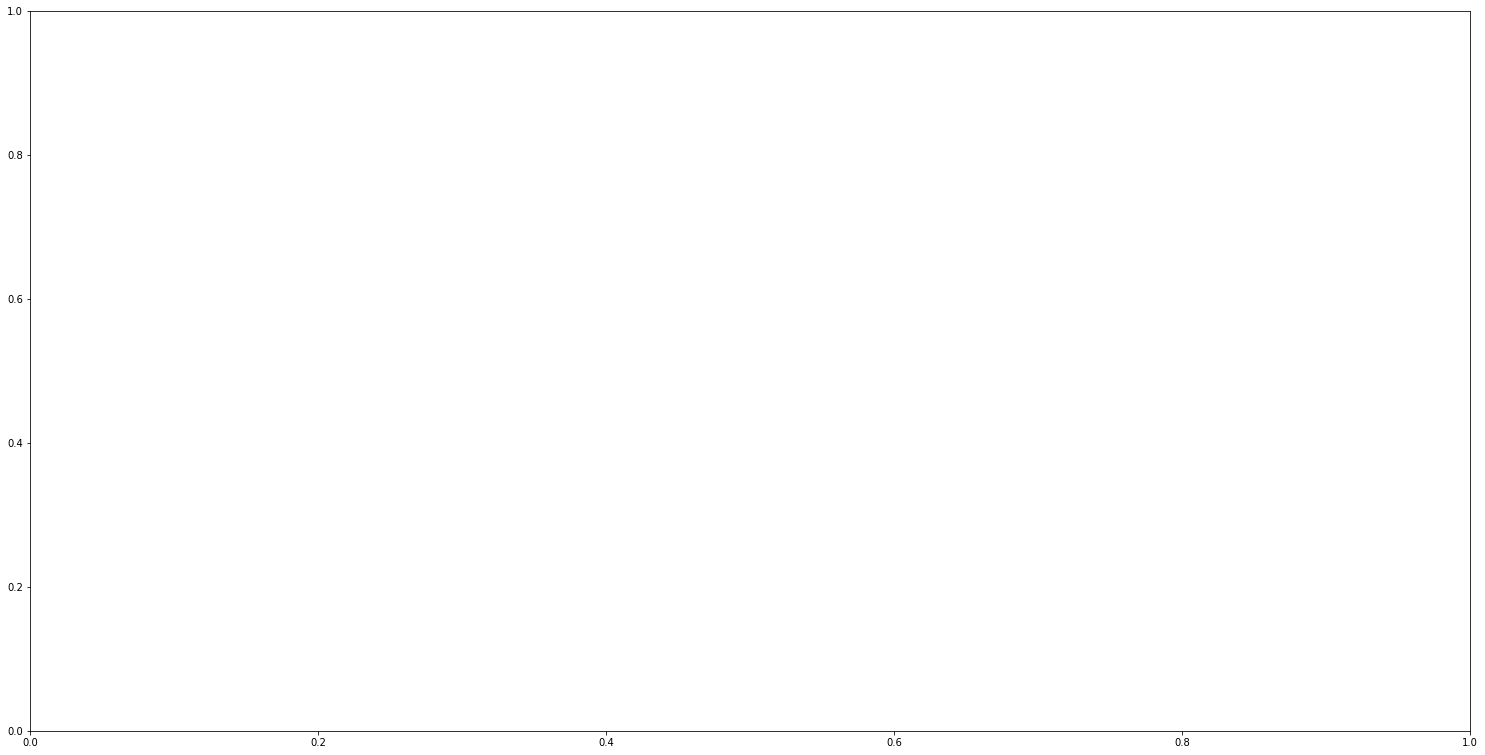

In [50]:
n = 7
plt.figure(figsize = (20, 10))
plt.axes([0, 0, 1, 1])

plt.bar(X[AC.labels_ == n].T, c='purple', alpha=.25)
plt.axis('tight')
# plt.axis('off')
plt.suptitle( f"Aggl.Clustering | Affinity=Cosine | User_Cluster_{n} | Count:{len(X[AC.labels_ == n])}", size=20)


In [128]:
# for index, metric in enumerate(["cosine"]):
#     model = AC
#     plt.figure(figsize = (20, 20))
#     plt.axes([0, 0, 1, 1])
#     for l, c in zip(np.arange(model.n_clusters), 'rgbky'):
#         plt.plot(x[a == l], c=c, alpha=.25)
#     plt.axis('tight')
#     plt.axis('off')
#     plt.suptitle("AgglomerativeClustering(affinity=%s)" % metric, size=20)

# plt.legend(labels = ['1', '2', '3', '4', '5'] )

# plt.show()

In [81]:
y = list(range(X.shape[0]))

In [129]:
# n_clusters = 5
# from sklearn.metrics import pairwise_distances
# for index, metric in enumerate(["cosine"]):
#     avg_dist = np.zeros((n_clusters, n_clusters))
#     plt.figure(figsize=(5, 4.5))
#     for i in range(n_clusters):
#         for j in range(n_clusters):
#             avg_dist[i, j] = pairwise_distances(X[y == i], X[y == j], metric=metric).mean()
#     avg_dist /= avg_dist.max()
#     for i in range(n_clusters):
#         for j in range(n_clusters):
#             plt.text(i, j, '%5.3f' % avg_dist[i, j], verticalalignment='center',horizontalalignment='center')

#     plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2,
#                vmin=0)
#     plt.xticks(range(n_clusters), labels, rotation=45)
#     plt.yticks(range(n_clusters), labels)
#     plt.colorbar()
#     plt.suptitle("Interclass %s distances" % metric, size=18)
#     plt.tight_layout()

In [96]:
model.n_leaves_

80633

In [85]:
X[y==0]

array([], shape=(0, 80633, 5), dtype=int64)

In [84]:
pairwise_distances(X[y == 0], X[y == 1], metric=metric).mean()

ValueError: Found array with dim 3. check_pairwise_arrays expected <= 2.

In [89]:
articles = pd.read_csv('FINAL.csv')

In [90]:
articles.shape

(2522, 17)

In [92]:
r = pd.read_csv('retweeterinfo.csv')

In [93]:
r.shape

(164677, 5)

In [110]:
r.head()

,Unnamed: 0,user_id,name,screen_name,tweet_id
0,0,49797918,cathy cravens,screen_name,1091044228631875584
1,1,21794771,TRAMP,screen_name,1091044228631875584
2,2,510153917,Lymond,screen_name,1091044228631875584
3,3,755571740,The Electric Strawberry,screen_name,1091044228631875584
4,4,2403016908,yuuji,screen_name,1091044228631875584


In [122]:
clusters['cluster'] = model.labels_

In [123]:
clusters.h

,Unnamed: 0,0,1,2,3,4,cluster
0,49797918,3,2,0,0,0,4
1,21794771,59,30,17,4,2,4
2,510153917,2,0,0,0,0,4
3,755571740,17,5,7,1,2,4
4,2403016908,332,277,128,66,50,4


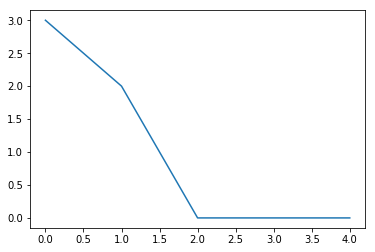

In [124]:
plt.plot([3, 2, 0, 0, 0])

In [157]:
clusters.shape

(80633, 7)

In [160]:
a = pd.read_csv('FINAL2.CSV')

In [161]:
a.shape

(2522, 20)

In [162]:
r.shape

(164677, 5)

In [193]:
clusters.head()

,Unnamed: 0,0,1,2,3,4,cluster
0,49797918,3,2,0,0,0,4
1,21794771,59,30,17,4,2,4
2,510153917,2,0,0,0,0,4
3,755571740,17,5,7,1,2,4
4,2403016908,332,277,128,66,50,4


In [176]:
clusters[clusters.cluster==4].sum(axis=0).values[1:-1]

array([62456, 19928,  7000,  5700,  2630])

In [177]:
Cluster_4 = clusters[clusters.cluster==4].sum(axis=0).values[1:-1]
Cluster_0 = clusters[clusters.cluster==0].sum(axis=0).values[1:-1]
cluster_1 = clusters[clusters.cluster==1].sum(axis=0).values[1:-1]
cluster_1 = clusters[clusters.cluster==1].sum(axis=0).values[1:-1]

In [183]:
d = {}
for i in range(5): 
    d[i] = clusters[clusters.cluster==i].sum(axis=0).values[1:-1]

In [181]:
list(range(5))

[0, 1, 2, 3, 4]

In [184]:
d

{0: array([ 2887,  1540, 13203,   751,   437]),
 1: array([  39,    0,    0,  141, 2833]),
 2: array([1063,    8,  225, 6684,   30]),
 3: array([ 3042, 29670,  2056,  1662,   692]),
 4: array([62456, 19928,  7000,  5700,  2630])}

In [194]:
df = pd.DataFrame(columns = ['Topic_0', 'Topic_1', 'Topic_2','Topic_3', 'Topic_4' ])

In [198]:
df['Topic_0'] = [v[0] for k, v  in d.items()]
df['Topic_1'] = [v[1] for k, v  in d.items()]
df['Topic_2'] = [v[2] for k, v  in d.items()]
df['Topic_3'] = [v[3] for k, v  in d.items()]
df['Topic_4'] = [v[4] for k, v  in d.items()]

In [199]:
df.head()

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
0,2887,1540,13203,751,437
1,39,0,0,141,2833
2,1063,8,225,6684,30
3,3042,29670,2056,1662,692
4,62456,19928,7000,5700,2630


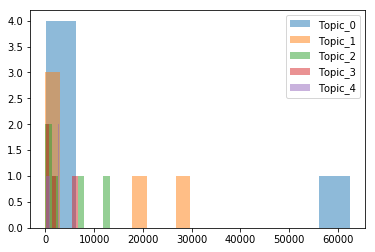

In [213]:
plt.hist(df["Topic_0"], alpha = .50)
plt.hist(df["Topic_1"], alpha = .50)
plt.hist(df["Topic_2"].T, alpha = .50)
plt.hist(df["Topic_3"].T, alpha = .50)
plt.hist(df["Topic_4"].T, alpha = .50)

plt.legend(labels = ['Topic_0', 'Topic_1',"Topic_2","Topic_3", "Topic_4" ])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1b435baba8>,
      dtype=object)

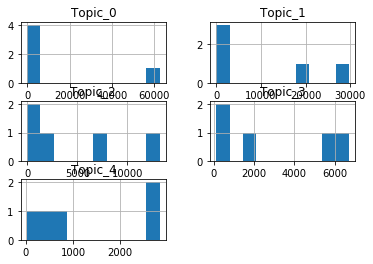

In [214]:
df.hist()